<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/EDA%2CFeature_Engineering%2CPreprocessing(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Load Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset1 = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#first five values of dataset
dataset1.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset2.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
dataset1.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#columns available in the dataset
dataset1.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
dataset2.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
#it gives the datatype of every column
dataset1.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

## **Pre-processing**

 Check for Missing Values:

In [ ]:
#prints the total count of missing values in each column
print(dataset1.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


# Exploratory Data Analysis (EDA)


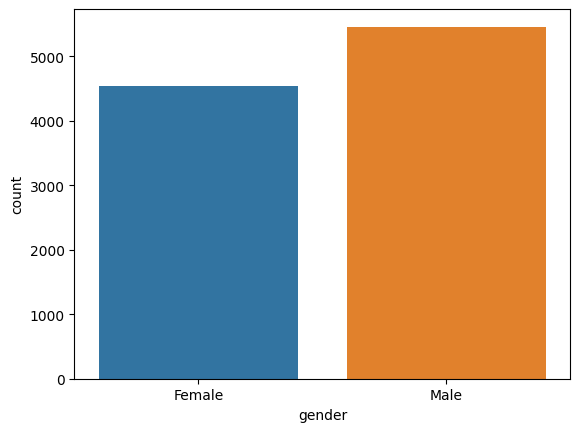

In [ ]:
# Countplot for categorical variables
sns.countplot(x='gender', data=dataset1)
plt.show()


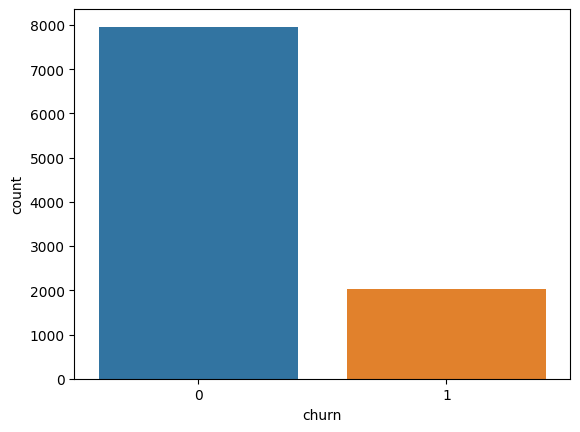

In [ ]:
sns.countplot(x='churn', data=dataset1)
plt.show()

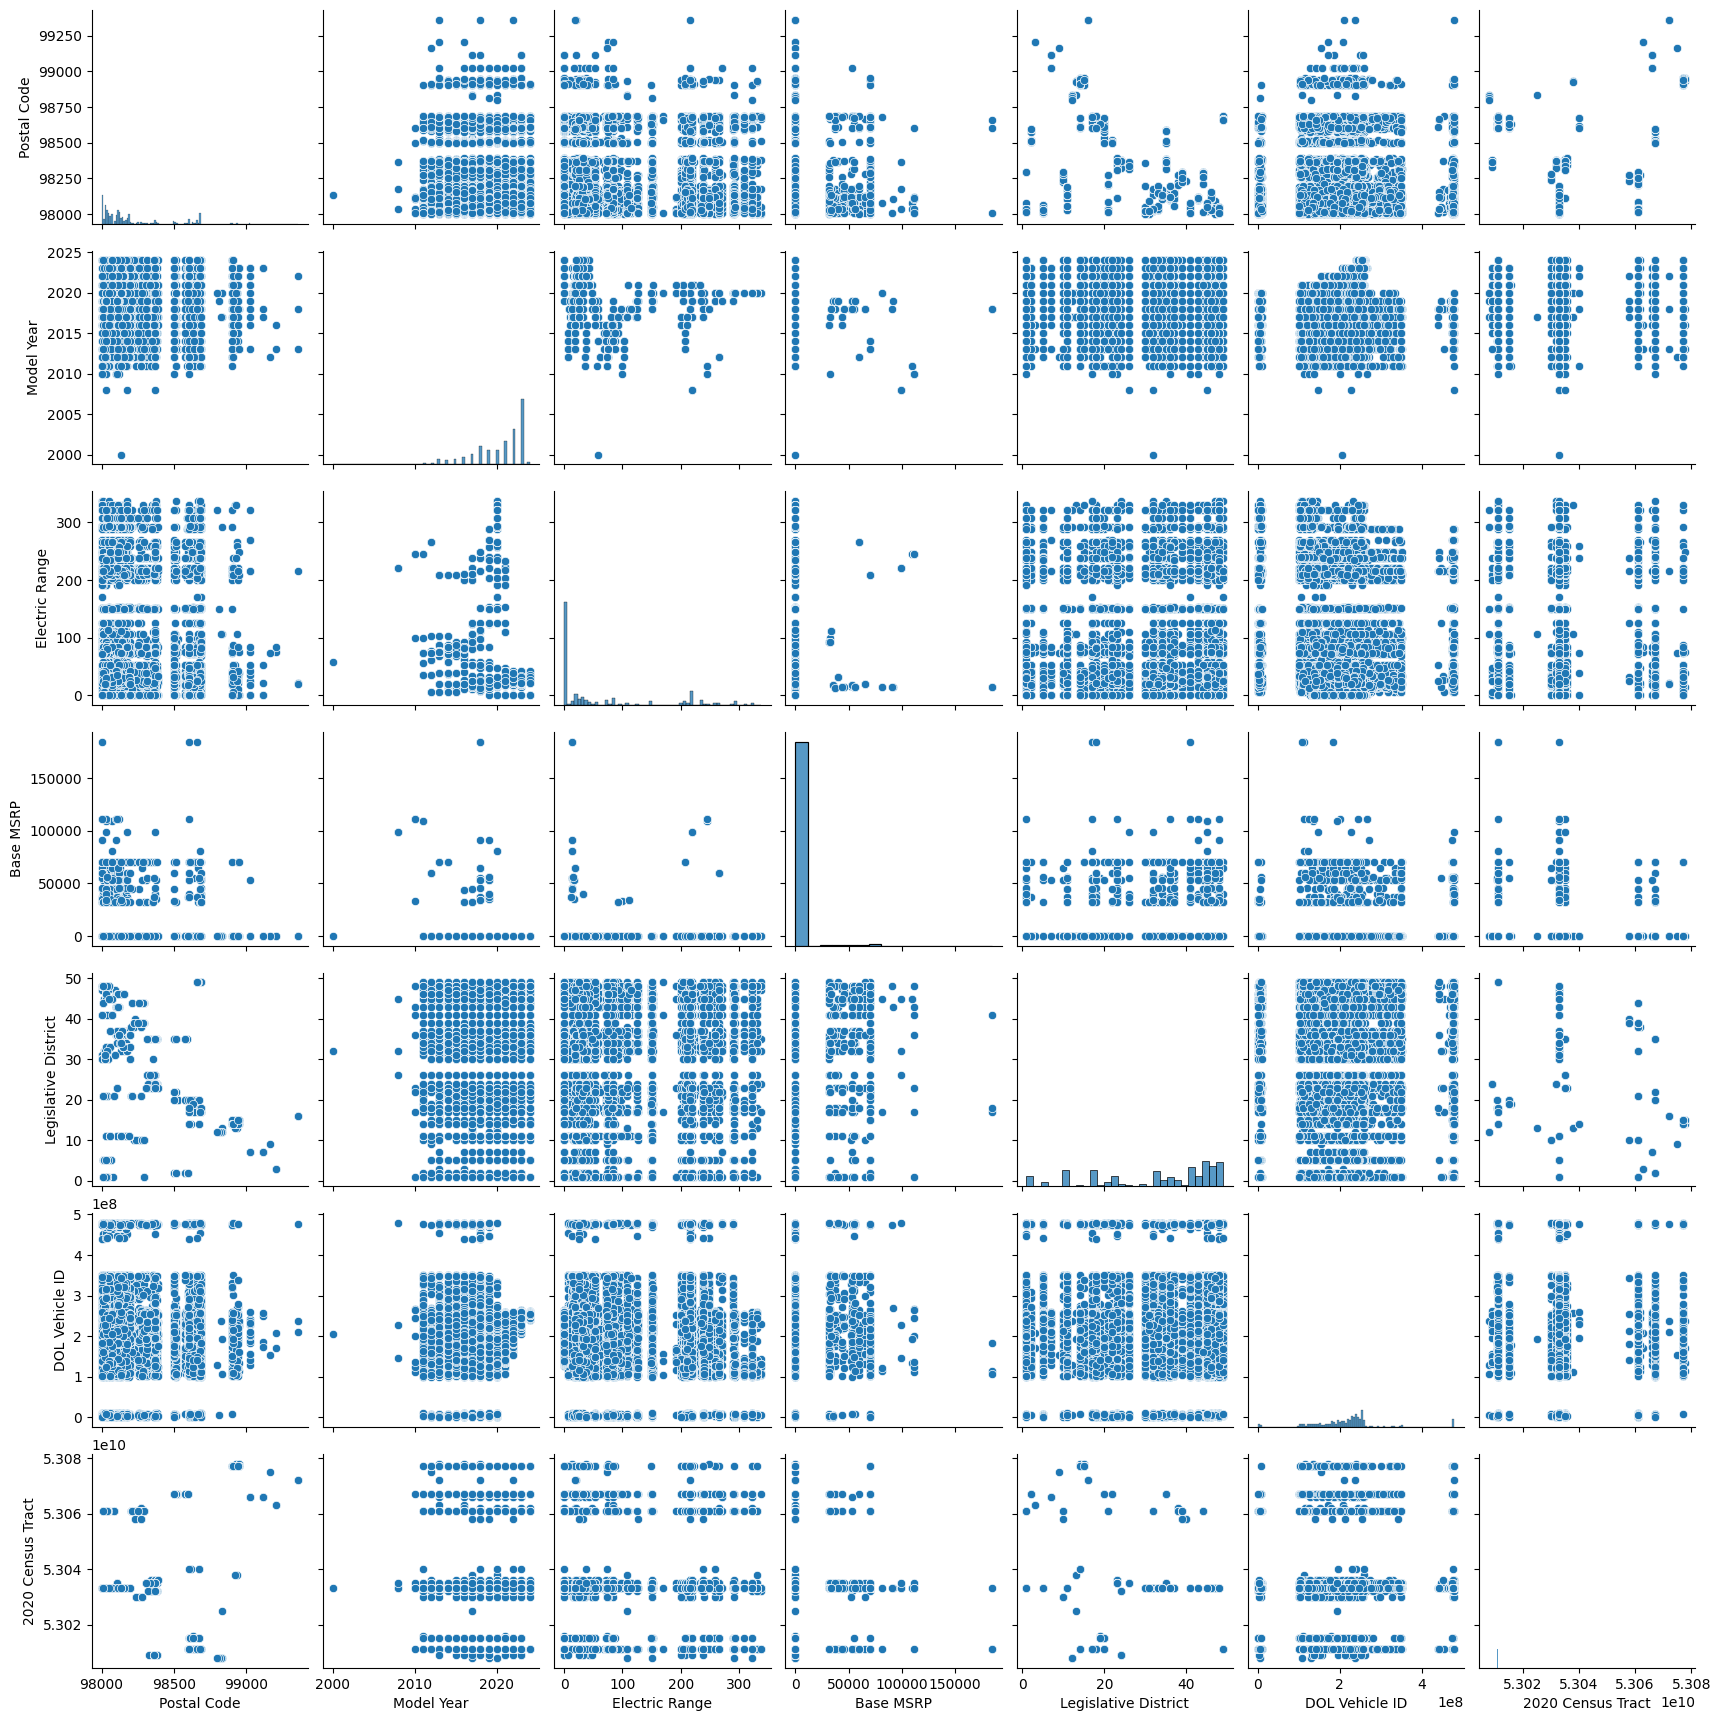

In [ ]:
# Pairplot for numerical variables
sns.pairplot(dataset2)
plt.show()


Feature Engineering

In [ ]:
#  Combining two numerical features
print(dataset2.columns)
dataset2['new_feature'] = dataset2['Base MSRP'] + dataset2['Electric Range']



Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'new_feature'],
      dtype='object')


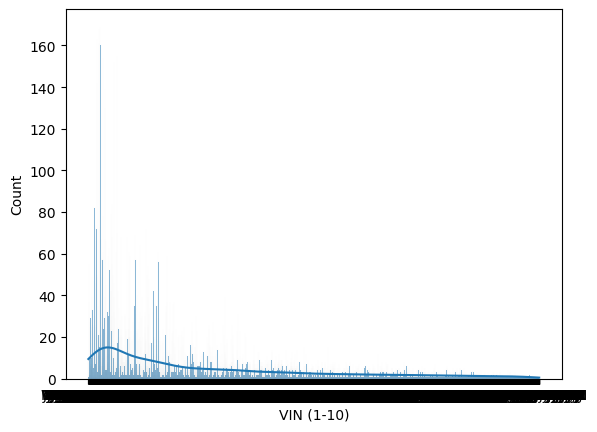

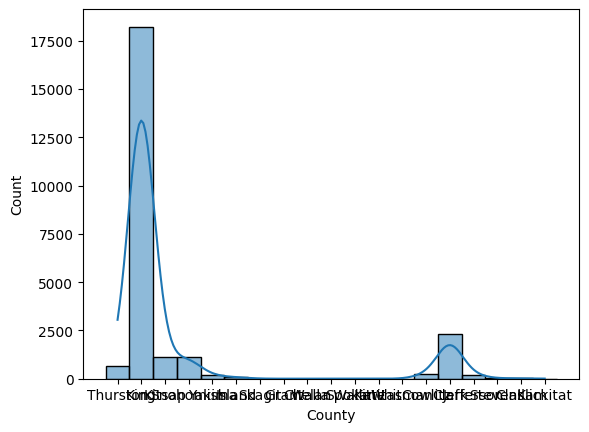

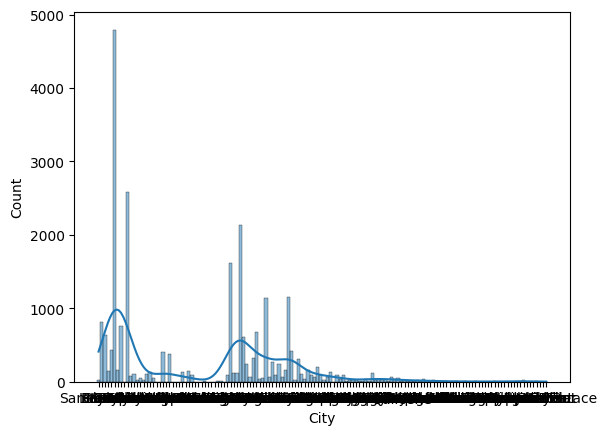

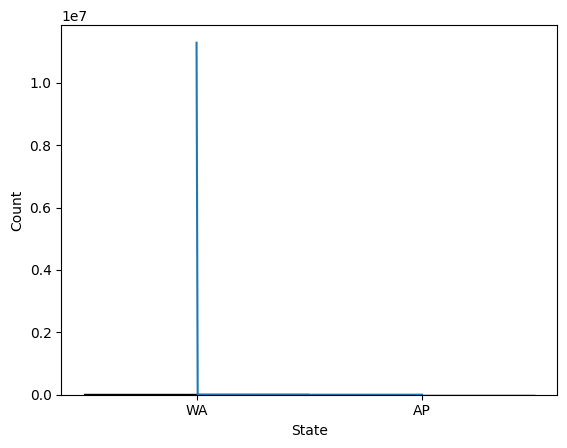

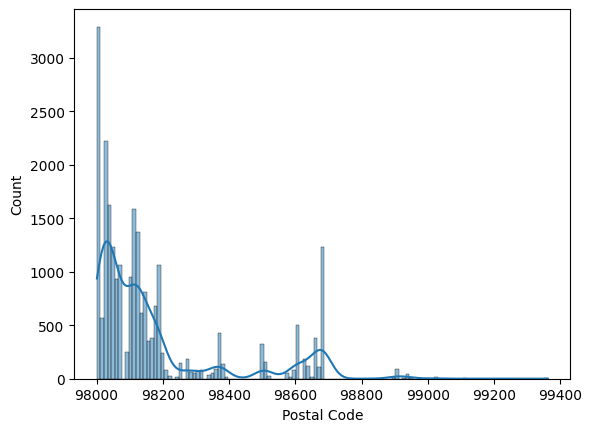

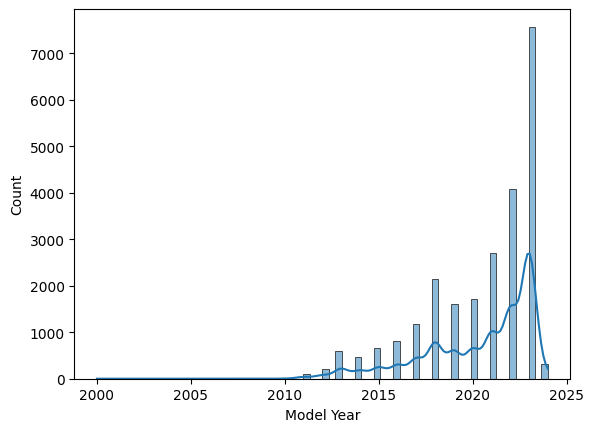

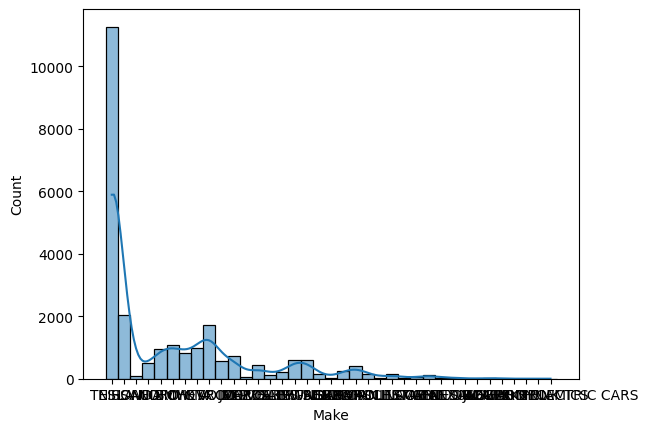

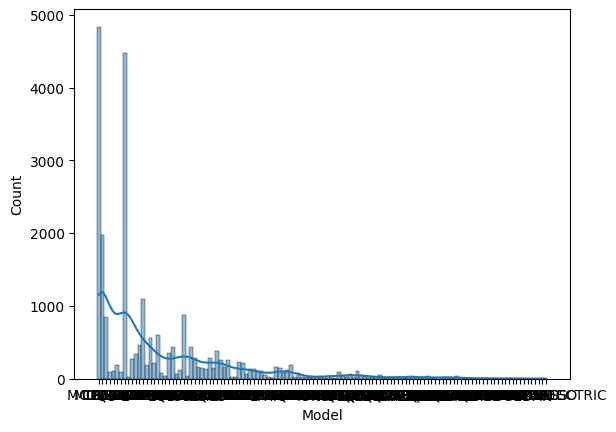

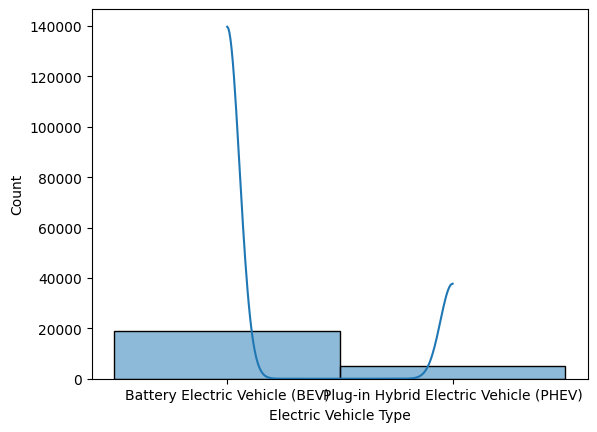

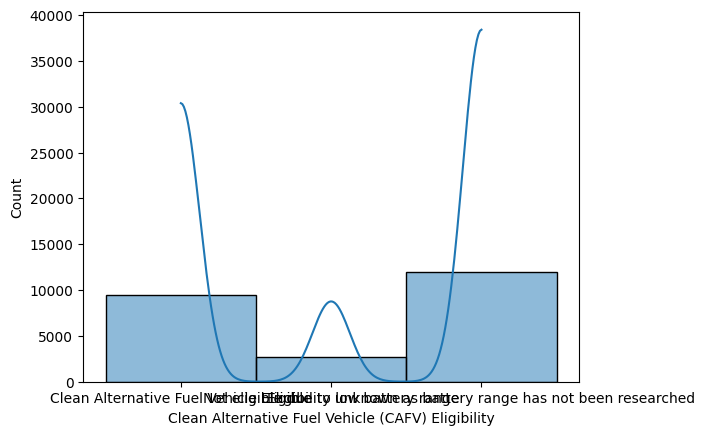

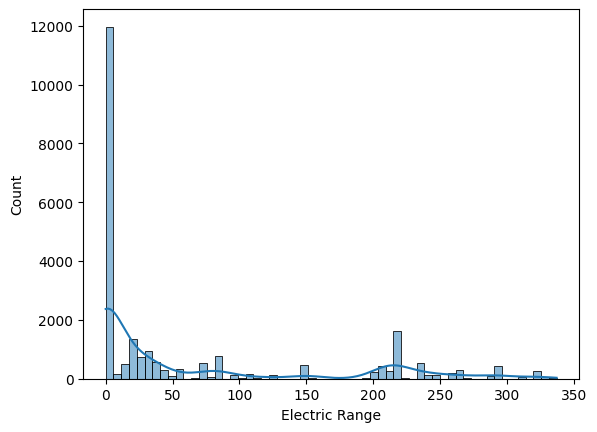

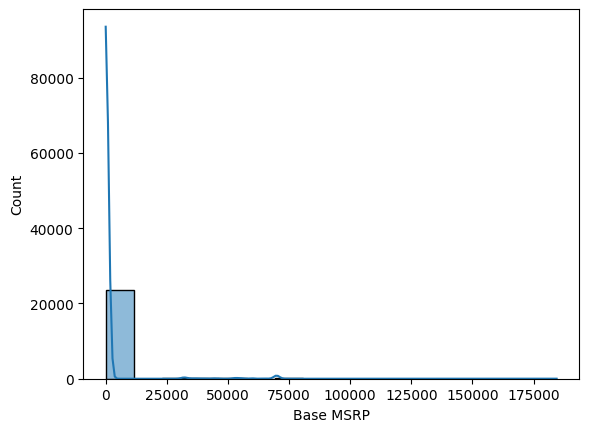

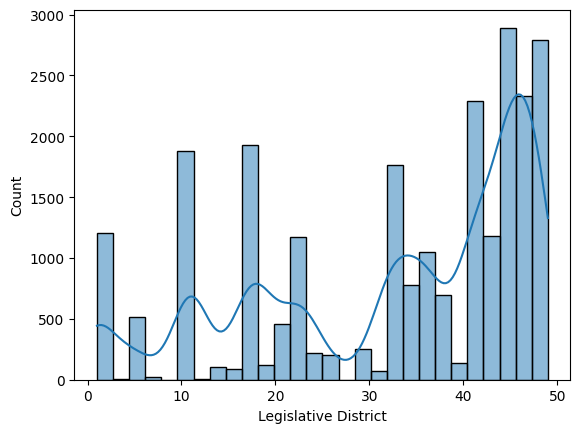

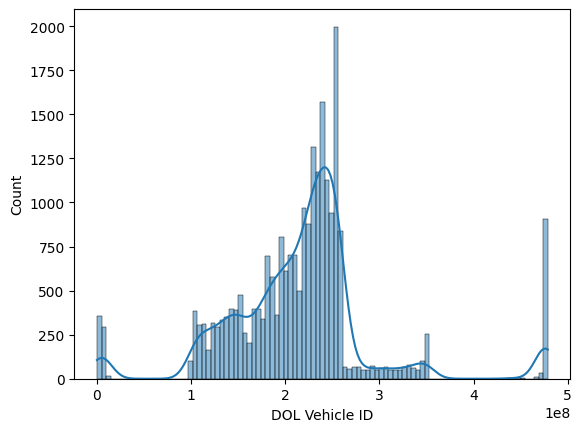

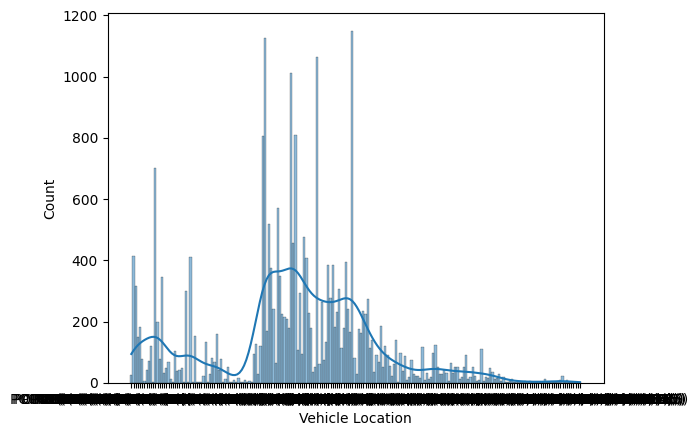

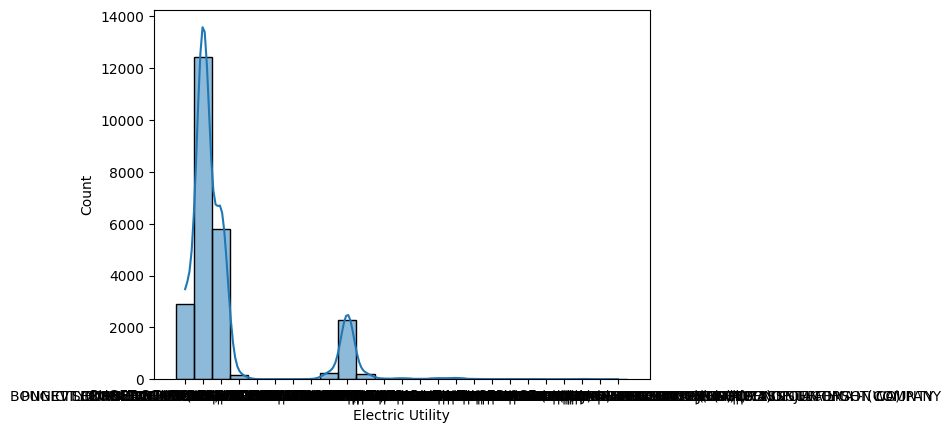

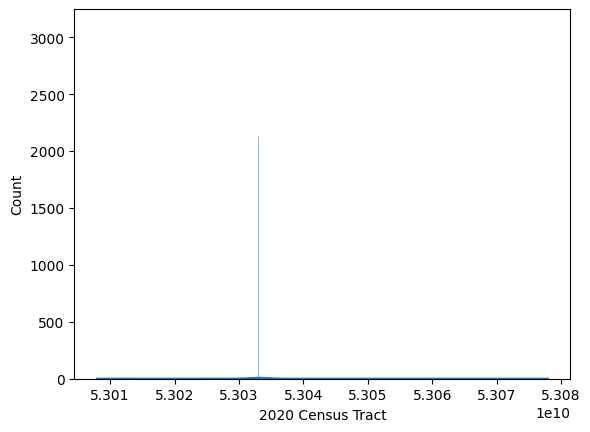

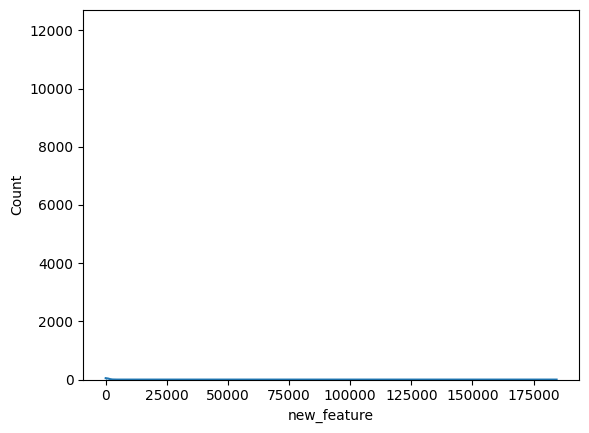

In [ ]:
for column in dataset2.columns:
  sns.histplot(dataset2[column],kde = True)
  plt.show()

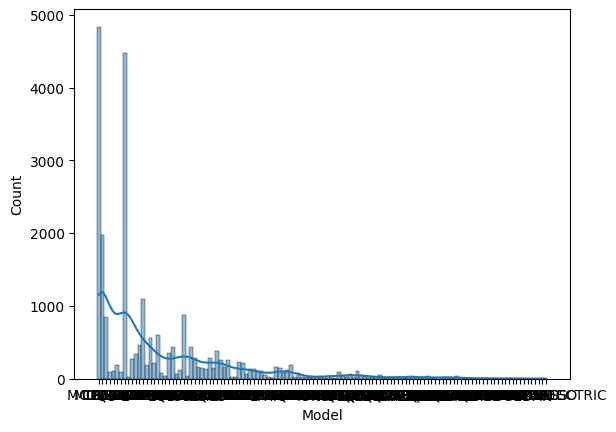

In [ ]:
sns.histplot(dataset2['Model'],kde = True)
plt.show()

In [ ]:
df = dataset2.drop(['Model Year'],axis=1)
df.info()
df.iloc[0:5]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24169 entries, 0 to 24168
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         24169 non-null  object 
 1   County                                             24168 non-null  object 
 2   City                                               24168 non-null  object 
 3   State                                              24169 non-null  object 
 4   Postal Code                                        24168 non-null  float64
 5   Make                                               24169 non-null  object 
 6   Model                                              24169 non-null  object 
 7   Electric Vehicle Type                              24169 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  24169 non-null  object 
 9   Electr

,VIN (1-10),County,City,State,Postal Code,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,new_feature
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10,291
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,150
2,5YJXCDE28G,King,Kent,WA,98031.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,200
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10,47
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10,23
